In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.datasets import *
import pandas as pd
import cv2 #To test on custom images # To import images you can use Image.tk too 

# Downloading the Dataset 
## Normalising & Pre-Procesing
### Declaration of Sigmoid, Loss , Forward Prop, Backward Prop Func


In [0]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X[:,10])

[0. 0. 0. ... 0. 0. 0.]


In [0]:
# Image Representation
X_res = X[1].reshape(28,28)


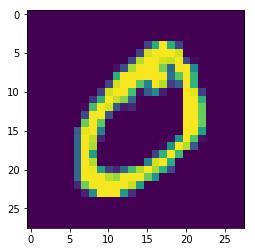

In [0]:
plt.imshow(X_res)
plt.show()

In [0]:
X = X/255
print(y)


['5' '0' '4' ... '4' '5' '6']


In [0]:
# one-hot encode labels
digits = 10
print(y.shape[0])                #No. of dataset entries
examples = y.shape[0]           
y = y.reshape(1, examples)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)



70000


In [0]:
# split, reshape, shuffle
m = 60000
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]
print(X_train.shape)

(784, 60000)


In [0]:
# Sigmoid Function
def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s

In [0]:
def softmax(z):
    s = e ^ z / sum(e ^ z)
    return s

In [0]:
# Compute Loss
def compute_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum
    return L

In [0]:
# Feed forward Propagation
def feed_forward(X, params):

    cache = {}

    cache["Z1"] = np.matmul(params["W1"], X) + params["b1"]
    cache["A1"] = sigmoid(cache["Z1"])
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)
    cache["Z3"] = np.matmul(params["W3"], cache["A2"]) + params["b3"]
    cache["A3"] = np.exp(cache["Z3"]) / np.sum(np.exp(cache["Z3"]), axis=0)
    

    return cache

In [0]:
# Back Propagation
def back_propagate(X, Y, params, cache):

    dZ3 = cache["A3"] - Y
    dW3 = (1./m_batch) * np.matmul(dZ3, cache["A2"].T)
    db3 = (1./m_batch) * np.sum(dZ3, axis=1, keepdims=True)
    
    
    dA2 = np.matmul(params["W3"].T, dZ3)
    dZ2 = dA2 * sigmoid(cache["Z2"]) * (1 - sigmoid(cache["Z2"]))
    dW2 = (1./m_batch) * np.matmul(dZ2, cache["A1"].T)
    db2 = (1./m_batch) * np.sum(dZ2, axis=1, keepdims=True)

    
    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))
    dW1 = (1./m_batch) * np.matmul(dZ1, X.T)
    db1 = (1./m_batch) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2,"dW3": dW3, "db3": db3}

    return grads
  

# Training

In [0]:
### Initialisation of Parameter and other hyperparameter declaration #####
np.random.seed(138)

# hyperparameters
n_x = X_train.shape[0]
n_h1 = 64
n_h2 = 32
learning_rate = 0.08
beta = .9
batch_size = 128
batches = -(-m // batch_size)

# initialization
params = { "W1": np.random.randn(n_h1, n_x) * np.sqrt(1. / n_x),
           "b1": np.zeros((n_h1, 1)) * np.sqrt(1. / n_x),
           "W2": np.random.randn(n_h2, n_h1) * np.sqrt(1. / n_h1),
           "b2": np.zeros((n_h2, 1)) * np.sqrt(1. / n_h1),
           "W3": np.random.randn(digits, n_h2) * np.sqrt(1. / n_h2),
           "b3": np.zeros((digits, 1)) * np.sqrt(1. / n_h2) }

V_dW1 = np.zeros(params["W1"].shape)
V_db1 = np.zeros(params["b1"].shape)
V_dW2 = np.zeros(params["W2"].shape)
V_db2 = np.zeros(params["b2"].shape)
V_dW3 = np.zeros(params["W3"].shape)
V_db3 = np.zeros(params["b3"].shape)





In [0]:
# train
train = []
test = []
for i in range(150):

    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = Y_train[:, permutation]

    for j in range(batches):

        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin

        cache = feed_forward(X, params)
        grads = back_propagate(X, Y, params, cache)

        V_dW1 = (beta * V_dW1 + (1. - beta) * grads["dW1"])
        V_db1 = (beta * V_db1 + (1. - beta) * grads["db1"])
        V_dW2 = (beta * V_dW2 + (1. - beta) * grads["dW2"])
        V_db2 = (beta * V_db2 + (1. - beta) * grads["db2"])
        V_dW3 = (beta * V_dW3 + (1. - beta) * grads["dW3"])
        V_db3 = (beta * V_db3 + (1. - beta) * grads["db3"])

        params["W1"] = params["W1"] - learning_rate * V_dW1
        params["b1"] = params["b1"] - learning_rate * V_db1
        params["W2"] = params["W2"] - learning_rate * V_dW2
        params["b2"] = params["b2"] - learning_rate * V_db2
        params["W3"] = params["W3"] - learning_rate * V_dW3
        params["b3"] = params["b3"] - learning_rate * V_db3

    cache = feed_forward(X_train, params)
    train_cost = compute_loss(Y_train, cache["A3"])
    cache = feed_forward(X_test, params)
    test_cost = compute_loss(Y_test, cache["A3"])
    train.append(train_cost)
    test.append(test_cost)
    print("E {}: Training cost = {}, Test cost = {}".format(i+1 ,train_cost, test_cost))

print("Done.")

E 1: Training cost = 2.26977115583027, Test cost = 2.26880485137033
E 2: Training cost = 2.1452407909609197, Test cost = 2.141133101068511
E 3: Training cost = 1.9788950116027493, Test cost = 1.9724470942251817
E 4: Training cost = 1.8084613438130683, Test cost = 1.8013085982386956
E 5: Training cost = 1.6456338742978507, Test cost = 1.6411806967548537
E 6: Training cost = 1.496076742942292, Test cost = 1.4941974577921204
E 7: Training cost = 1.348713726193463, Test cost = 1.347649850407181
E 8: Training cost = 1.213360603685921, Test cost = 1.211834235577573
E 9: Training cost = 1.1172340884701328, Test cost = 1.1141832364643869
E 10: Training cost = 1.0609396604720729, Test cost = 1.0540312059024288
E 11: Training cost = 1.000056593621028, Test cost = 0.9925320319934123
E 12: Training cost = 0.9374500425002059, Test cost = 0.9309936341374334
E 13: Training cost = 0.9003214120050205, Test cost = 0.8934737580521162
E 14: Training cost = 0.8674798871024412, Test cost = 0.860391952654690

# Results
## Visualisation


In [0]:
# Results
cache = feed_forward(X_test, params)
predictions = np.argmax(cache["A3"], axis=0)
labels = np.argmax(Y_test, axis=0)
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      1111
           1       0.97      0.97      0.97      1139
           2       0.87      0.91      0.89       987
           3       0.73      0.97      0.83       755
           4       0.93      0.83      0.88      1091
           5       0.85      0.69      0.76      1099
           6       0.91      0.91      0.91       954
           7       0.88      0.91      0.89       997
           8       0.88      0.88      0.88       973
           9       0.81      0.92      0.86       894

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



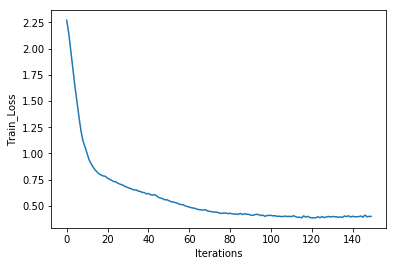

In [0]:
# Plotting Train cost
plt.plot(train)
plt.ylabel("Train_Loss")
plt.xlabel("Iterations")
plt.show()

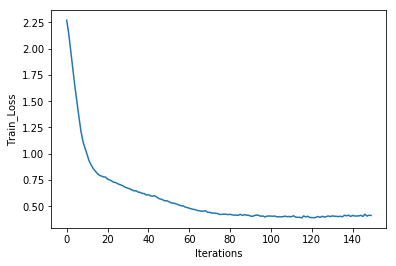

In [0]:
# Plotting Test Cost
plt.plot(test)
plt.ylabel("Train_Loss")
plt.xlabel("Iterations")
plt.show()